# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Load the dataset

In [2]:
df = pd.read_csv('salary_data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

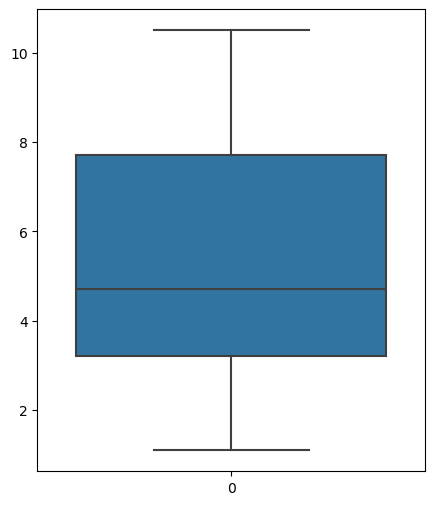

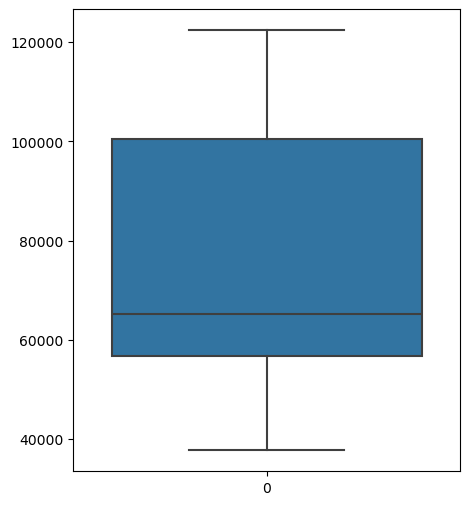

In [6]:
for col in df.columns:
    plt.figure(figsize=(5,6))
    sns.boxplot(df[col])

In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


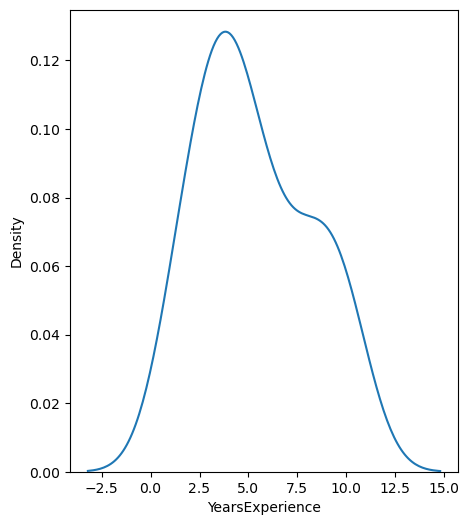

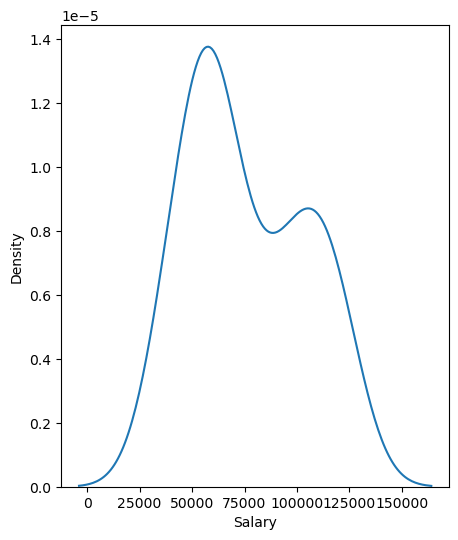

In [8]:
for col in df.columns:
    plt.figure(figsize=(5,6))
    sns.kdeplot(df[col])
plt.show()

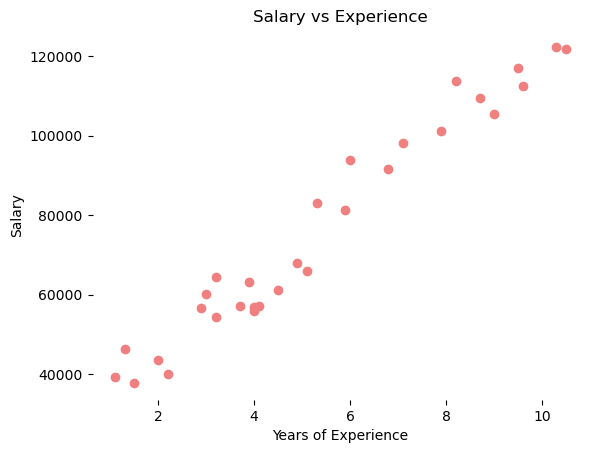

In [9]:
# Relationship between Salary and Experience
plt.scatter(df['YearsExperience'], df['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

In [13]:
#Splitting Dataset

In [14]:
X = df.drop('Salary', axis=1) # independent features
y = df['Salary']              # dependent features

In [15]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [16]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

# Split data into Train/Test sets
- Further, split your data into training (80%) and test (20%) sets using train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [18]:
X_train.shape

(24, 1)

In [19]:
X_test.shape

(6, 1)

# Train the regression model
Pass the X_train and y_train data into the regressor model by regressor.fit to train the model with our training data.

In [20]:
lreg = LinearRegression()

In [21]:
lreg.fit(X_train,y_train)

LinearRegression()

# Predict the result
when we are all set and ready to predict any value of y (Salary) dependent on X (Experience) with the trained model using regressor.predict

In [22]:
y_pred =lreg.predict(X_test)

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Salary', ylabel='Density'>

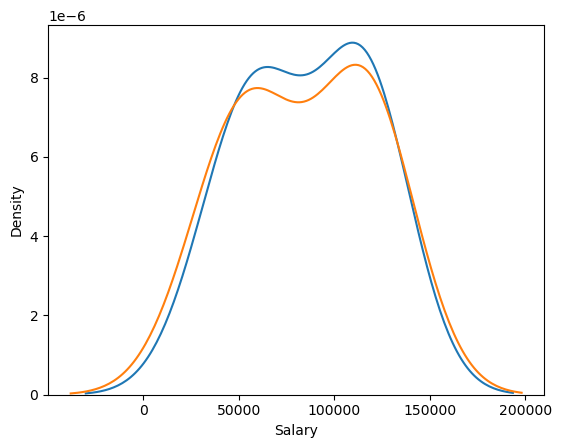

In [23]:
sns.kdeplot(y_pred)
sns.kdeplot(y_test)

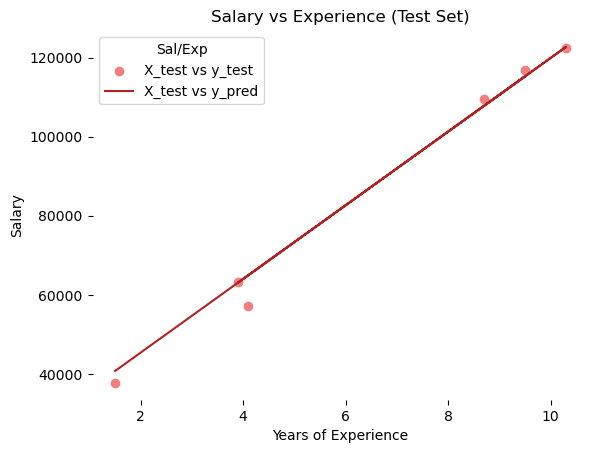

In [24]:
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_test, y_pred, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_test vs y_test', 'X_test vs y_pred'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

## Mean Absolute Error (MAE):
- A lower MAE indicates better performance.
- It measures the magnitude of errors without considering their direction (overestimation or underestimation).
# R-squared (R²) Score
- R² ranges from 0 to 1.
- A higher R² indicates a better fit of the model to the data.
- Use R² when you want to assess the overall goodness of fit of the model.
- It quantifies how well the model explains the variability in the target variable.

In [25]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE of linear regression model is:", mae)
print("R2 score of linear regression model is:", r2)

MAE of linear regression model is: 2446.1723690465055
R2 score of linear regression model is: 0.988169515729126


In [26]:
dt = DecisionTreeRegressor()

In [27]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [28]:
dt_pred = dt.predict(X_test)

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Salary', ylabel='Density'>

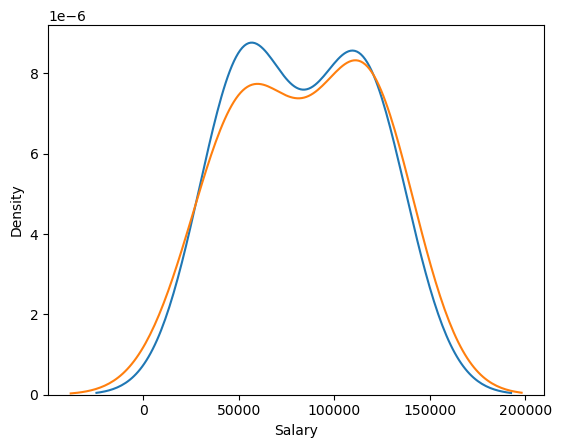

In [29]:
sns.kdeplot(dt_pred)
sns.kdeplot(y_test)

In [30]:
mae = mean_absolute_error(y_test, dt_pred)
r2 = r2_score(y_test, dt_pred)
print("MAE of decision tree regression model is:", mae)
print("R2 score of decision tree regression model is:", r2)

MAE of decision tree regression model is: 4120.666666666667
R2 score of decision tree regression model is: 0.9764754205531827


In [39]:
import joblib

In [40]:
joblib.dump(lreg,'model_salary')

['model_salary']

In [37]:
df = pd.DataFrame({'YearsExperience':2.0},index=[0])

In [38]:
lreg.predict(df)

array([45405.24940409])